#                                         Negassi Tesfay
##                                      Defective Device Prediction 

Summary <br>
> Purpose of this exercise is to predict device failure based on the measurement of the metrics before and afer failure<br> 
> The data is more or less clean, and my main focus was to give an insight by EDA and the build a model<br> 

Tasks
> Exploratory data analysis
> Model building




### Load Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler

pd.set_option("display.max_columns", 999)
sns.set_style("white")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## -- Custom color vector
colors = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
 
tableau_20 = [(c[0] / 255.0, c[1] / 255.0, c[2] / 255.0) for c in colors]

### Set working dirctory

In [5]:
%cd C:\Users\negas\OneDrive\Desktop\dDevice
!ls 

C:\Users\negas\OneDrive\Desktop\dDevice
WorkSubmission
WorkSubmission.zip
predictive_maintenance.csv


### Load Data

In [6]:
dev_data= pd.read_csv('predictive_maintenance.csv')
dev_data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## Target variable - 'failure'

In [7]:
dev_data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [9]:
dev_data.shape

(124494, 12)

We have unbalanced data! need to be handled before modeling.

## Feature variables

In [10]:
dev_data.iloc[:,3:].describe()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


### Box plot to see for outliers and check if the individual features classify well. 
#### Metrics 6 look a good separator.

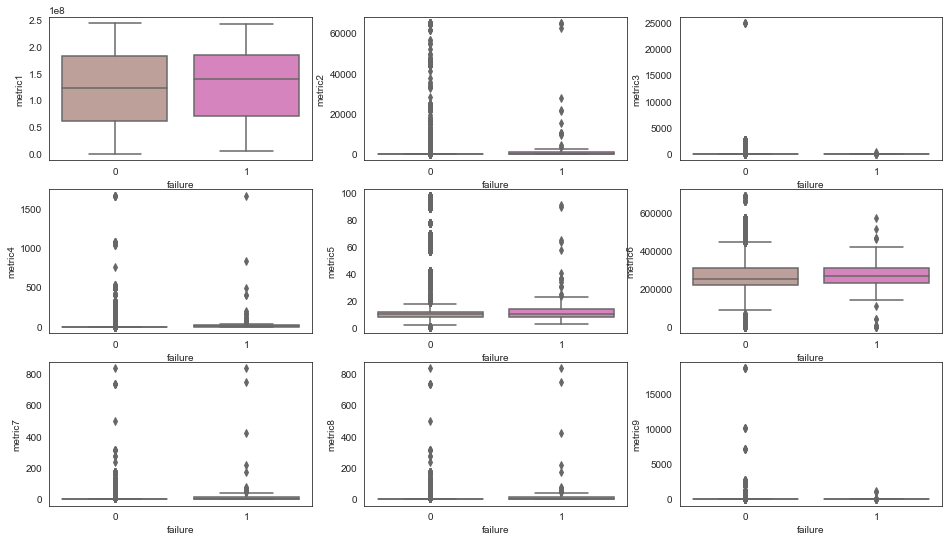

In [11]:
data_fail=dev_data[dev_data.failure==1]
fig, ax =plt.subplots(3,3, sharey=False,figsize=(16,9))

sns.boxplot(x='failure', y='metric1', data=dev_data, ax=ax[0,0],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric2', data=dev_data, ax=ax[0,1],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric3', data=dev_data, ax=ax[0,2],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric4', data=dev_data, ax=ax[1,0],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric5', data=dev_data, ax=ax[1,1],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric6', data=dev_data, ax=ax[1,2],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric7', data=dev_data, ax=ax[2,0],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric8', data=dev_data, ax=ax[2,1],palette=tableau_20[11:19])
sns.boxplot(x='failure', y='metric9', data=dev_data, ax=ax[2,2],palette=tableau_20[11:19])


### Distribution plot to see for outliers and check if the individual features classify well.
#### metri8 and metric7 seem equal hence, delete one of them.

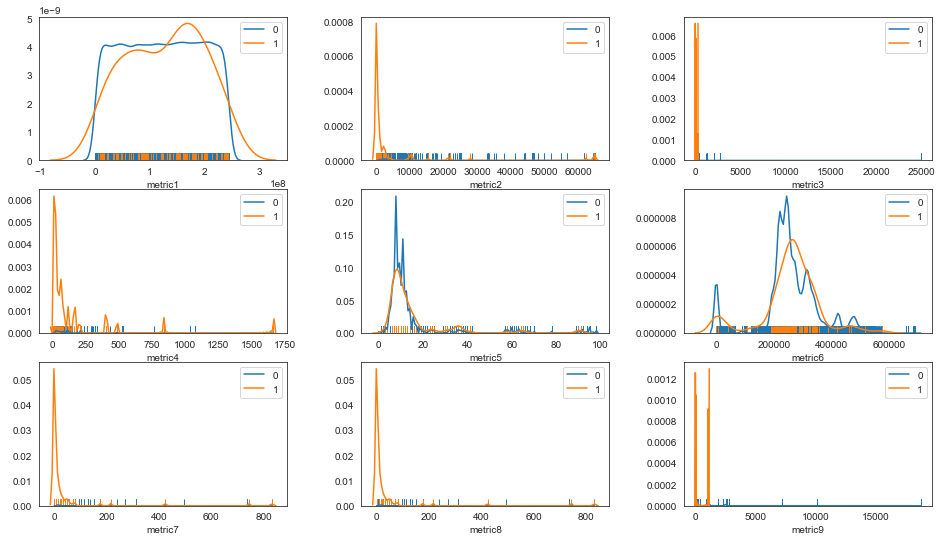

In [12]:
fig, ax =plt.subplots(3,3, sharey=False,figsize=(16,9))
fig.subplots_adjust(wspace=.3)
g = sns.FacetGrid(dev_data, hue="failure", height=4, aspect=2,)
g.map(sns.distplot, "metric1", hist=False, rug=True, ax=ax[0,0])
g.map(sns.distplot, "metric2", hist=False, rug=True, ax=ax[0,1])
g.map(sns.distplot, "metric3", hist=False, rug=True, ax=ax[0,2])
g.map(sns.distplot, "metric4", hist=False, rug=True, ax=ax[1,0])
g.map(sns.distplot, "metric5", hist=False, rug=True, ax=ax[1,1])
g.map(sns.distplot, "metric6", hist=False, rug=True, ax=ax[1,2])
g.map(sns.distplot, "metric7", hist=False, rug=True, ax=ax[2,0])
g.map(sns.distplot, "metric8", hist=False, rug=True, ax=ax[2,1])
g.map(sns.distplot, "metric9", hist=False, rug=True, ax=ax[2,2])

plt.close()
plt.show()


#### verify if matrics are identical

In [13]:
(dev_data.metric7== dev_data.metric8).sum()

124494

### Standaridize variables 

In [14]:
scale=StandardScaler()
scale.fit(dev_data.iloc[:,3:])
df_scale=scale.transform(dev_data.iloc[:,3:])
df_scale=pd.DataFrame(df_scale,columns=dev_data.iloc[:,3:].columns)
df_scale[['failure','device','date']]=dev_data[['failure','device','date']]
df_scale.head()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure,device,date
0,1.323358,-0.047478,-0.053516,2.193905,-0.515755,1.485268,-0.039335,-0.039335,-0.028479,0,S1F01085,1/1/15
1,-0.865998,-0.073170,-0.037365,-0.076004,-0.515755,1.442263,-0.039335,-0.039335,-0.065047,0,S1F0166B,1/1/15
2,0.722517,-0.073170,-0.053516,-0.076004,-0.139414,-0.229738,-0.039335,-0.039335,-0.065047,0,S1F01E6Y,1/1/15
3,-0.605942,-0.073170,-0.053516,-0.076004,-0.515755,1.512983,-0.039335,-0.039335,-0.065047,0,S1F01JE0,1/1/15
4,0.192770,-0.073170,-0.053516,-0.076004,0.048757,0.534543,-0.039335,-0.039335,-0.049375,0,S1F01R2B,1/1/15


### Investigate if date variable is important.

#### Calculate the number of days from the first date of installation.

In [15]:
# Group each unique device and calculae the number of days after the first day of that device.
df_min=df_scale.groupby('device')['date'].min()
df_merge=pd.merge(df_min, df_scale, on='device', how='outer')
df_merge[['date_x','date_y']] = df_merge[['date_x','date_y']].apply(pd.to_datetime) 
df_merge['diff'] = (df_merge['date_y'] - df_merge['date_x']).dt.days
df_merge.shape

# cnt=df_scale.groupby('device').date.transform('min')
# df_scale['count']=cnt
# df_scale.head()

(124494, 14)

#### Subset devices that eventually failed after time

In [16]:
df_fail = df_merge.groupby('device').filter(lambda x: (x['failure'] == 1).any())
df_fail.shape

(10713, 14)

In [17]:

## this to subset devices that have more than 200 measurements
cnt=df_fail['device'].value_counts()
v = cnt[(cnt.index != 0) & (cnt >= 200)].index.values
df_surv=df_fail.query("device in @v")
df_cnt=df_surv.copy()

In [18]:
## This is to give a jitter to the scatter plots, with out jitter the will be alligned in one line.
devs =df_cnt['device'].unique()
df_cnt['failure']=df_cnt['failure']*100 
i=0
for dev in devs:
    i+=1
    df_cnt.loc[df_cnt.device == dev, 'failure'] = df_cnt.loc[df_cnt.device==dev,'failure']+i

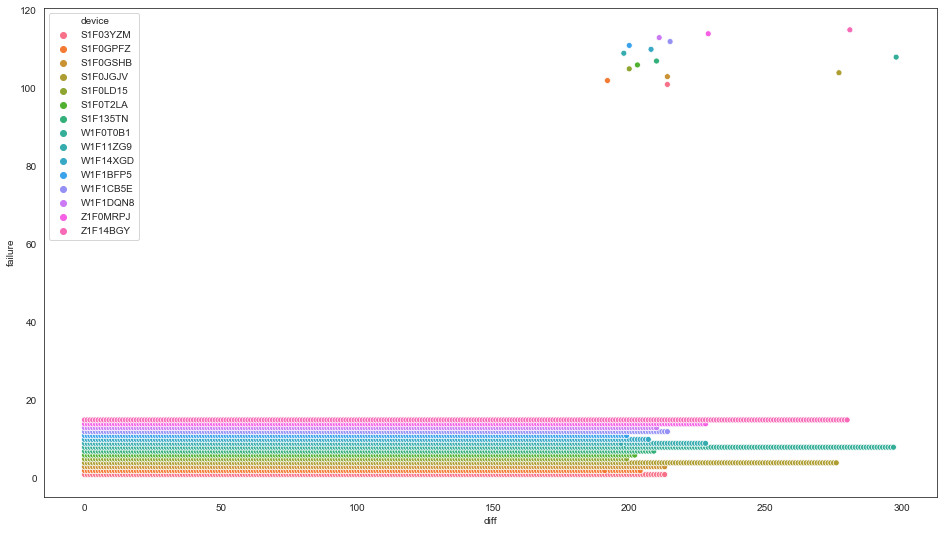

In [19]:
plt.figure(figsize=(16,9))
g=sns.scatterplot(x="diff", y="failure", hue="device", data=df_cnt)


#### The plot clearly shows that the number of days affects the failure.

In [20]:
df_surv=df_surv[['device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
                 'metric5', 'metric6', 'metric7', 'metric9', 'diff']]

#### Before taking including to the model, check if duration covariates with the other variables.

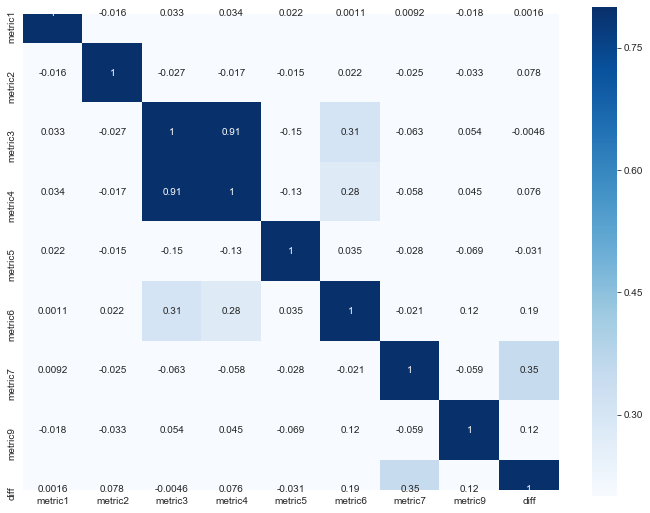

In [21]:
#correlation matrix
corrmat = df_surv.iloc[:,2:].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=.2, vmax=.8, square=True, annot=True,cmap='Blues');

In [22]:
df_merge.columns

Index(['device', 'date_x', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'failure',
       'date_y', 'diff'],
      dtype='object')

In [35]:
df_merge=df_merge[['failure','metric1', 'metric2', 'metric3', 'metric4','metric5',
                   'metric6', 'metric8', 'metric9','diff']]

In [36]:
df_merge.to_csv('dev_model.csv')
# df_surv.to_csv('dev_surv.csv')